In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# inter = "PF"
hyperloop_name = "RTS24_AC_12w_dummy_0.3_v0.4_PF_LB_0_40"
hyperloop_name = "3-bus_AC_12w_dummy_0.3_v0.4_PF_LCOE_0_10"
hyperloop_name = "9n_AC_12w_dummy_0.3_v0.4_PF_LCOE_0_37_v2"
cluster_run = True
if cluster_run: 
    results = pd.read_csv(f"ResultsClusterRuns/Loss_results_csv/{hyperloop_name}.csv")


In [4]:
results.columns

Index(['Unnamed: 0', 'Model_type', 'Dor', 'Relu_out', 'Batch_size', 'Lr',
       'Epochs', 'Np', 'Min_val', 'Tr_l', 'Te_l', 'V_l', 'Tr_l_t_mse',
       'Te_l_t_mse', 'V_l_t_mse', 'Tr_l_mae', 'Te_l_mae', 'V_l_mae',
       'Tr_l_ret', 'Train_time', 'Eval_time', 'alpha', 'beta', 'MAE',
       'Test size', 'Val size'],
      dtype='object')

<Axes: xlabel='Model_type', ylabel='Te_l'>

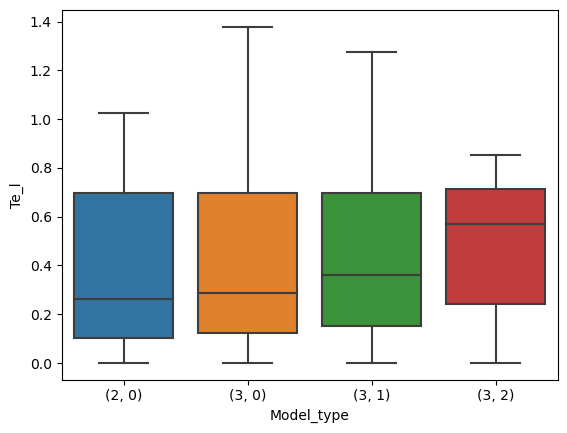

In [5]:
sns.boxplot(y = "Te_l",x="Model_type",data = results)

In [6]:
#Next we add a filter, for the test_loss to be smaller than 0.001#
f = (results.Te_l_t_mse <=100000)

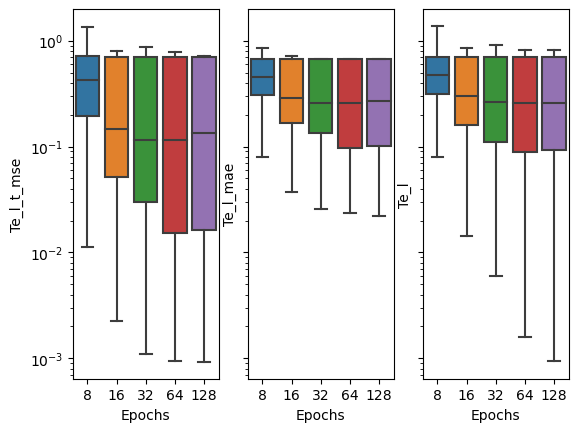

In [7]:
fig, axs = plt.subplots(1,3,sharey =True)

w=2.5
x="Epochs"

sns.boxplot(y = "Te_l_t_mse",x=x,data = results[f],ax = axs[0],whis=w)
axs[0].set_yscale("log")
sns.boxplot(y = "Te_l_mae",x=x,data = results[f],ax=axs[1],whis=w)
axs[1].set_yscale("log")
sns.boxplot(y = "Te_l",x=x,data = results[f],ax=axs[2],whis=w)
axs[2].set_yscale("log")


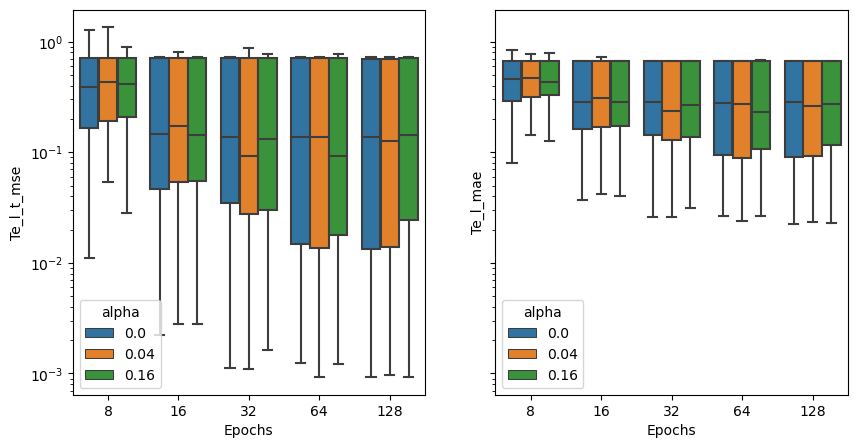

In [8]:
fig, axs = plt.subplots(1,2,sharey =True,figsize = (10,5))

w=2.5
x="Epochs"
h = "alpha"
sns.boxplot(y = "Te_l_t_mse",x=x,data = results[f],ax = axs[0],whis=w,hue=h)
axs[0].set_yscale("log")
sns.boxplot(y = "Te_l_mae",x=x,data = results[f],ax=axs[1],whis=w,hue=h)
axs[1].set_yscale("log")


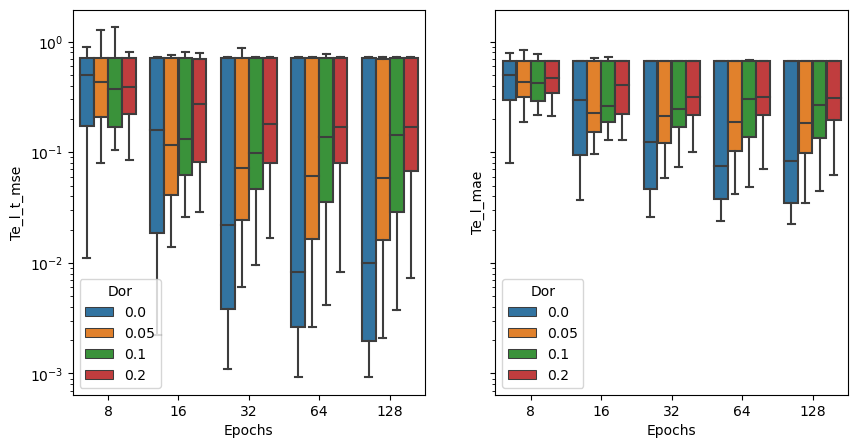

In [11]:
fig, axs = plt.subplots(1,2,sharey =True,figsize = (10,5))

w=2.5
x="Epochs"
h = "Dor"
sns.boxplot(y = "Te_l_t_mse",x=x,data = results[f],ax = axs[0],whis=w,hue=h)
axs[0].set_yscale("log")
sns.boxplot(y = "Te_l_mae",x=x,data = results[f],ax=axs[1],whis=w,hue=h)
axs[1].set_yscale("log")

<Axes: xlabel='Min_val', ylabel='V_l'>

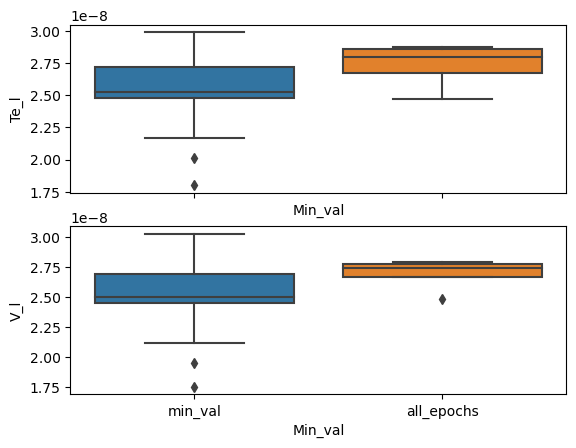

In [25]:
fig, axs = plt.subplots(2,1,sharex =True)
sns.boxplot(y = "Te_l",x="Min_val",data = results[f],ax = axs[0])
sns.boxplot(y = "V_l",x="Min_val",data = results[f],ax = axs[1])

<Axes: xlabel='Epochs', ylabel='V_l'>

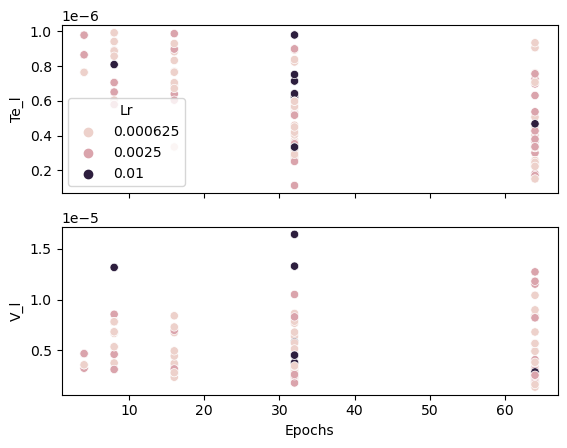

In [16]:
f = (results.Te_l <=1e-6)
fig, axs = plt.subplots(2,1,sharex =True)
sns.scatterplot(y = "Te_l",x="Epochs",data = results[f],ax = axs[0],hue = "Lr")
sns.scatterplot(y = "V_l",x="Epochs",data = results[f],ax = axs[1],hue = "Lr",legend = False)

<Axes: xlabel='Epochs', ylabel='V_l'>

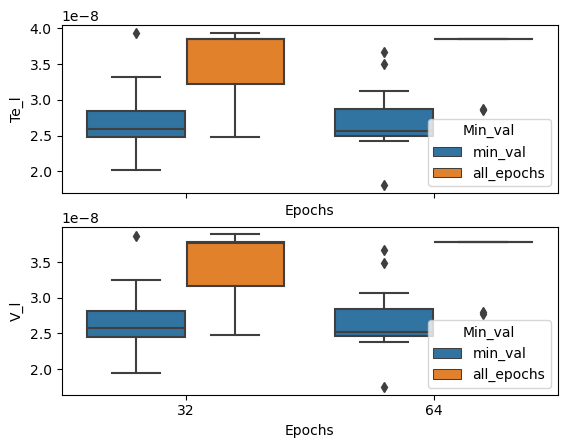

In [29]:
f = (results.Te_l <=4e-8)
fig, axs = plt.subplots(2,1,sharex =True)
sns.boxplot(y = "Te_l",x="Epochs",data = results[f],ax = axs[0],hue = "Min_val")
sns.boxplot(y = "V_l",x="Epochs",data = results[f],ax = axs[1],hue = "Min_val")

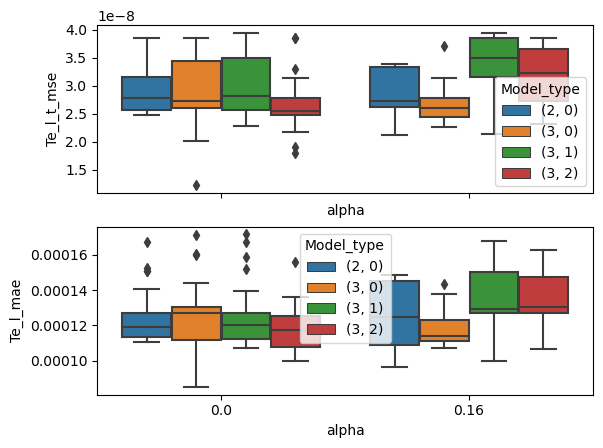

In [31]:
f = (results.Te_l_t_mse <=4e-8)
fig, axs = plt.subplots(2,1,sharex =True)
sns.boxplot(y = "Te_l_t_mse",x="alpha",data = results[f],ax = axs[0],hue = "Model_type")
sns.boxplot(y = "Te_l_mae",x="alpha",data = results[f],ax = axs[1],hue = "Model_type")
plt.savefig("Figures/dummy_il/Lr_effect_Testloss_falpha.png")

<Axes: xlabel='alpha', ylabel='Te_l_mae'>

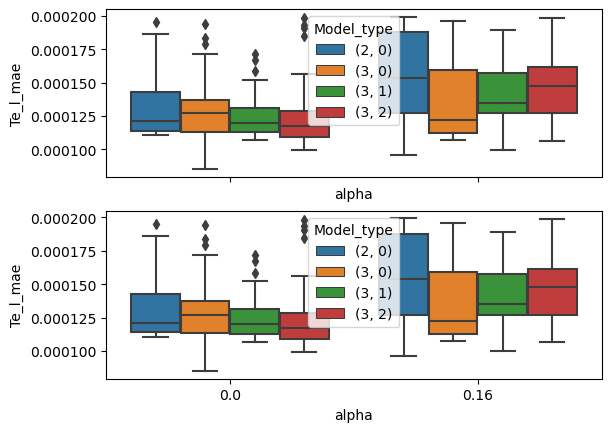

In [43]:
f = (results.Te_l_mae <=2e-4)
fig, axs = plt.subplots(2,1,sharex =True)
sns.boxplot(y = "Te_l_mae",x="alpha",data = results[f],ax = axs[0],hue = "Model_type")
sns.boxplot(y = "Te_l_mae",x="alpha",data = results[f],ax = axs[1],hue = "Model_type")

<Axes: xlabel='Batch_size', ylabel='Te_l_t_mse'>

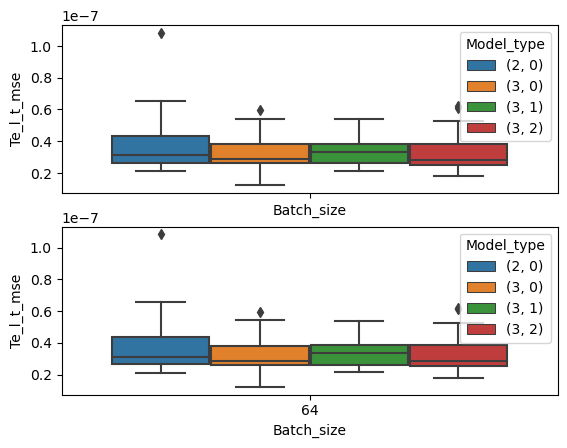

In [41]:
f = (results.Te_l_mae <=2e-4)
fig, axs = plt.subplots(2,1,sharex =True)
sns.boxplot(y = "Te_l_t_mse",x="Batch_size",data = results[f],ax = axs[0],hue = "Model_type")
sns.boxplot(y = "Te_l_t_mse",x="Batch_size",data = results[f],ax = axs[1],hue = "Model_type")


<Axes: xlabel='Relu_out', ylabel='Te_l_mae'>

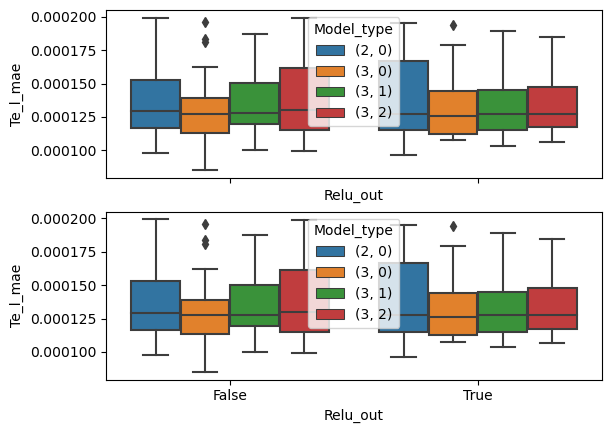

In [47]:
f = (results.Te_l_mae <=2e-4)
fig, axs = plt.subplots(2,1,sharex =True)
sns.boxplot(y = "Te_l_mae",x="Relu_out",data = results[f],ax = axs[0],hue = "Model_type")
sns.boxplot(y = "Te_l_mae",x="Relu_out",data = results[f],ax = axs[1],hue = "Model_type")

<Axes: xlabel='Relu_out', ylabel='Te_l_t_mse'>

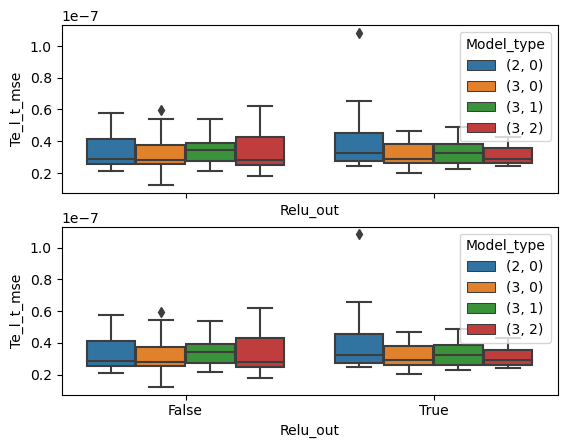

In [48]:
f = (results.Te_l_mae <=2e-4)
fig, axs = plt.subplots(2,1,sharex =True)
sns.boxplot(y = "Te_l_t_mse",x="Relu_out",data = results[f],ax = axs[0],hue = "Model_type")
sns.boxplot(y = "Te_l_t_mse",x="Relu_out",data = results[f],ax = axs[1],hue = "Model_type")